In [34]:
# Importação
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [35]:
# configuração dos parâmetros do Pandas
pd.set_option("mode.copy_on_write", True)

In [36]:
# configurar os plots do matplotlib
rcParams['figure.figsize'] = 12, 4 # tamanho da grade da figura a ser criada
rcParams['lines.linewidth'] = 3 # quantidade de linhas
rcParams['xtick.labelsize'] = 'x-large' # largura do eixo x é o total da tela disponível
rcParams['ytick.labelsize'] = 'x-large' # largura do eixo y é o total da tela disponível

In [37]:
#Carregando o arquivo JSON
arquivo = "Dados/dados_compras.json"
base = pd.read_json(arquivo, orient = "records")

### EDA 1 - Análise Geral de Compras

* Número total de consumidores
* Preço médio de compra
* Número total de compras
* Rendimento total

In [38]:
dados_demo = base[["Login","Sexo","Valor"]] # retornar todas as linhas das colunas selecionadas
dados_demo = dados_demo.drop_duplicates("Login")# retira todas os usuário que tiveram mais de uma compra

total_usuários = dados_demo["Login"].count()# Total de usuários da base demográfica
quantidade_vendas = base["Valor"].count()# Quantidade de vendas realizadas
media_vendas = base["Valor"].mean()# Médidas das vendas realizadas
total_vendas = base["Valor"].sum()# Somatório das vendas realizadas

# criar um dataframe para juntar todas as variáveis criadas 
vendas = pd.DataFrame({"Numero Total de Usuários":total_usuários,
                      "Quantidade de Vendas":quantidade_vendas,
                      "Valor Médio de Vendas": media_vendas,
                      "Total de vendas":total_vendas},
                       index= ["Total"])

# ajustar formato dos numeros com função map (só funciona com pd)
vendas["Numero Total de Usuários"] = vendas["Numero Total de Usuários"].map("{:,}".format)
vendas["Quantidade de Vendas"] = vendas["Quantidade de Vendas"].map("{:}".format)
vendas["Valor Médio de Vendas"] = vendas["Valor Médio de Vendas"].map("R$ {:,.2f}".format)
vendas["Total de vendas"] = vendas["Total de vendas"].map("R$ {:,.2f}".format)

display(vendas)

,Numero Total de Usuários,Quantidade de Vendas,Valor Médio de Vendas,Total de vendas
Total,573,780,R$ 2.93,"R$ 2,286.33"


### EDA 2 - Análise Demográfica por Gênero

* Porcentagem e contagem de compradores masculinos
* Porcentagem e contagem de compradores do sexo feminino
* Porcentagem e contagem de outros / não divulgados

In [ ]:
# Localizar todas as linhas das colunas sexo e valor agrupa-las por sexo
vendas_sexo = pd.DataFrame(base[["Sexo","Valor"]].groupby("Sexo").count())
#realizar a porcentagem da variável anterior
vendas_sexo_por = pd.DataFrame(base[["Sexo","Valor"]].groupby("Sexo").count()/total_vendas*100)
#Realizar a média das vendas por gênero
vendas_sexo_me = base.loc[:,["Sexo","Valor"]].groupby("Sexo").mean()

# Concatenar valores em um único Dataframe
novas_vendas = pd.concat(
                        [vendas_sexo,vendas_sexo_por,vendas_sexo_me], 
                        axis= 1, 
                        keys= ["Total de Vendas", "Porcetagem das Vendas", "Media de vendas"])
# axis = 1 indica que o dataframe será concatenado em colunas
# Keys para definir o nome dos títulos

# Formatação dos valores
# Todo ajuste de formatação dos valores
# Todo: testar o assign para criar colunas personalizadas de Porcentagem e Média
# Todo: Retirar Valor e Sexo do Dataframe
# Todo: Alinhar o texto do dataframe

display(novas_vendas)

In [ ]:
leg = ["Feminino","Masculino","Outros/Não Divulgados"]
val = [133, 633, 11]

fig, ax = plt.subplots()
bar_colors = ['tab:red', 'tab:blue', 'tab:orange'] # colors
bar_container = ax.bar(leg, val, color = bar_colors)
ax.set(ylabel='Total de Vendas', title='Total por Gênero', ylim=(0, 700))
ax.bar_label(bar_container, fmt='{:,.0f}')
# todo - colocar a porcentagem no gráfico

### EDA 3 - Análise de Compras Por Gênero

* Número de compras
* Preço médio de compra
* Valor Total de Compra
* Compras for faixa etária

In [72]:
# Restringir a base de Dados para facilitar a análise
base_genero = base[["Sexo","Valor"]]

#agrupar valores por genero com o groupyby
total_gen = base_genero.groupby("Sexo").sum()
total_qntd = base_genero.groupby("Sexo").count()
total_gen_media = base_genero.groupby("Sexo").mean()
total_gen_por = base_genero.groupby("Sexo").sum()/ total_vendas*100

# Concatenar todas as tabelas em um único Dataframe
genero = pd.concat([total_gen,total_qntd,total_gen_media,total_gen_por], 
                   keys= ["Total de Vendas por Gênero", "Quantidade de Vendas", "Media de Vendas", "Porcentagem"], 
                   axis = 1)

#genero.assign()
# Todo: testar o assign para criar colunas personalizadas
# Todo: Retirar Valor e Sexo do Dataframe
# Todo: Alinhar o texto do dataframe

display(genero)

,Total de Vendas por Gênero,Quantidade de Vendas,Media de Vendas,Porcentagem
,Valor,Valor,Valor,Valor
Sexo,,,,
Feminino,382.91,136,2.815515,16.747801
Masculino,1867.68,633,2.950521,81.688995
Outro / Não Divulgado,35.74,11,3.249091,1.563204


In [82]:
# colocar um for para fazer 4 Plots

# colocar algum plot com graficos
v0 = total_gen.v
#v1 =
#v2 = 

data_p = {'Feminino': 10, 'Masculino': 15, 'Outro': 5}
names = ["Feminino","Masculino","Outro"]
#names = list(data_p.keys())
values = list(data_p.values())

fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
axs[0].bar(names, vo) # Primeiro eixo do Plot

axs[1].scatter(names, values) # segundo eixo do plot

axs[2].plot(names, values) # terceito eixo do plot

fig.suptitle('Vendas por Gênero') # Título do Plot


TypeError: 'numpy.ndarray' object is not callable

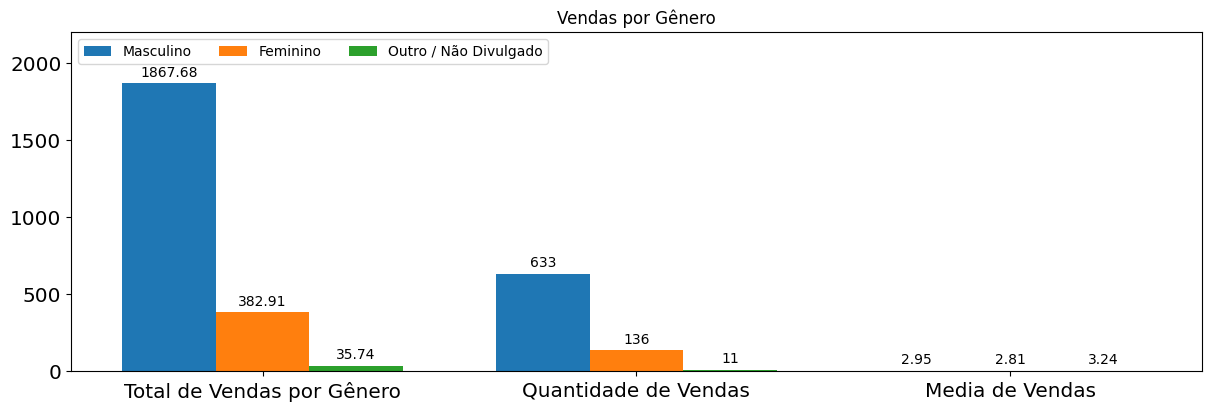

In [61]:
# Plot # FInalizar configuração
# data from https://allisonhorst.github.io/palmerpenguins/

leg = ("Total de Vendas por Gênero", "Quantidade de Vendas", "Media de Vendas")
legdata = {
    'Masculino': (1867.68,633,2.95),
    'Feminino': (382.91,136,2.81),
    'Outro / Não Divulgado': (35.74,11,3.24),
}

x = np.arange(len(leg))  # local das legendas
width = 0.25  # tamanho das barras
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in legdata.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1
    

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('valor')
ax.set_title('Vendas por Gênero') # Tìtulo do Gráfico
ax.set_xticks(x + width, leg)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 2200) # faixa do eixo y do valor

plt.show()

In [43]:
# adicionando nova coluna para criar grupo de idades
base['Faixa Idade'] = np.where((base['Idade'] > 1) & (base['Idade'] <= 20), "1-20",
                np.where((base['Idade'] > 20) & (base['Idade'] <= 40), "21-40",
                np.where((base['Idade'] > 40) & (base['Idade'] <= 60), "41-60",
                np.where((base['Idade'] > 60) & (base['Idade'] <= 80), "61-80",
                np.where((base['Idade'] > 80) & (base['Idade'] <= 100), "80-100", "Acima de 100")))))

In [44]:
# Plot das idades
base_idade = base[["Faixa Idade","Valor"]]

total_id = base_idade.groupby("Faixa Idade").sum();
total_qntd_id = base_idade.groupby("Faixa Idade").count()
total_gen_media_id = base_idade.groupby("Faixa Idade").mean()
total_gen_id = base_idade.groupby("Faixa Idade").sum()/ total_vendas*100

idade = pd.concat([total_id,total_qntd_id,total_gen_media_id,total_gen_id], 
                   keys= ["Total de Vendas por Faixa Etária", "Quantidade de Vendas", "Media de Vendas", "Porcentagem"], 
                   axis = 1)

display(idade)

,Total de Vendas por Faixa Etária,Quantidade de Vendas,Media de Vendas,Porcentagem
,Valor,Valor,Valor,Valor
Faixa Idade,,,,
1-20,849.51,294,2.889490,37.156054
21-40,1428.18,483,2.956894,62.466048
41-60,8.64,3,2.880000,0.377898


#### EDA 5 -  Consumidores Mais Populares (Top 5)
### Identifique os 5 principais compradores pelo valor total de compra e, em seguida, liste (em uma tabela): **

* Login
* Número de compras
* Preço médio de compra
* Valor Total de Compra
* Itens mais populares

In [45]:
# Restringir a base de Dados para facilitar a análise
base_consumidores = base[["Login","Valor","Nome do Item"]]

# Agrupar o total de vendas realizado por cada consumidor, ordenandos na ordem decresente do valor total de vendas
top5_tot = pd.DataFrame(base_consumidores.groupby("Login").sum("Valor")).sort_values(by = "Valor", ascending= False)
top5_cont = pd.DataFrame(base_consumidores.groupby("Login")["Valor"].count())
top5_med = pd.DataFrame(base_consumidores.groupby("Login").mean("Valor"))
top5_item = pd.DataFrame(base_consumidores.groupby("Nome do Item")["Login"]) # verificar o index a ser colocado

comp5 = pd.concat([top5_tot,top5_cont,top5_med,top5_item],axis = 1, keys=  ["Valor Total", "Numero de Compras", "Preço Médio de Compra","Item mais Comprado"])

display(comp5.head(5))


Valor Total Numero de Compras Preço Médio de Compra   
                  Valor             Valor                 Valor   
Undirrala66       17.06               5.0              3.412000  \
Saedue76          13.56               4.0              3.390000   
Mindimnya67       12.74               4.0              3.185000   
Haellysu29        12.73               3.0              4.243333   
Eoda93            11.58               3.0              3.860000   

            Item mais Comprado       
                             0    1  
Undirrala66                NaN  NaN  
Saedue76                   NaN  NaN  
Mindimnya67                NaN  NaN  
Haellysu29                 NaN  NaN  
Eoda93                     NaN  NaN

In [46]:
# Plot

### EDA 6 - Itens Mais Populares
### Identifique os 5 itens mais populares por contagem de compras e, em seguida, liste (em uma tabela):

* ID do item
* Nome do item
* Número de compras
* Preço do item
* Valor Total de Compra
* Itens mais lucrativos

In [47]:
# Restringir a base de Dados para facilitar a análise
base_consumidores = base[["Item ID","Nome do Item","Valor"]]

# Agrupar oos items pelo ID e pelo total de vednas realizada
item5_tot = pd.DataFrame(base_consumidores.groupby("Item ID").sum("Valor")).sort_values(by = "Valor", ascending= False)
item5_cont = pd.DataFrame(base_consumidores.groupby("Item ID")["Valor"].count())
item5_med = pd.DataFrame(base_consumidores.groupby("Item ID").mean("Valor"))
item5_item = pd.DataFrame(base_consumidores.groupby("Item ID")["Nome do Item"]) # verificar o index a ser colocado

item5 = pd.concat([item5_tot,item5_cont,item5_med,item5_item],axis = 1, keys=["Valor Total", "Numero de Compras", "Preço Médio de Compra","Item mais Comprado"])

display(item5.head(5))

Valor Total Numero de Compras Preço Médio de Compra Item mais Comprado   
          Valor             Valor                 Valor                  0   
34        37.26               9.0                  4.14               34.0  \
115       29.75               7.0                  4.25              115.0   
32        29.70               6.0                  4.95               32.0   
103       29.22               6.0                  4.87              103.0   
107       28.88               8.0                  3.61              107.0   

                                                        
                                                     1  
34   57     Retribution Axe
126    Retribution Axe
...  
115  107    Spectral Diamond Doomblade
250    Spect...  
32   50     Orenmir
83     Orenmir
227    Orenmir
3...  
103  100    Singed Scalpel
468    Singed Scalpel
47...  
107  164    Splitter, Foe Of Subtlety
275    Splitt...

### EDA 7 - Itens Mais Lucrativos
### Identifique os 5 itens mais lucrativos pelo valor total de compra e, em seguida, liste (em uma tabela): **

* ID do item
* Nome do item
* Número de compras
* Preço do item
* Valor Total de Compra

ML 1 - Engenharia de Atributo